# Readme

- The following codes contain 3 parts:
    - Section 1: Helper functions:
        - Run this section first; this contains a function to draw the evolution of training and testing loss
    - Section 2: Data simulation.
        - Run either the **2.1 Simple Data** section or the **2.2 Sophisticated Data** section to simulate data
    - Section 3: Build models.
        - First, run either **3.1 Model A** or **3.2 Model B**.
        - Then, sequentially run the subsections thereafter (3.3,3.4,3.5)

# Helper functions

In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
import matplotlib.pyplot as plt
from matplotlib import style

style.use('seaborn')

In [2]:
def train_test_loss_plot(train_loss,test_loss):
    '''
    Input: 
    - train_loss: an array of training losses
    - test_loss: an array of testing losses
    '''
    assert len(train_loss) == len(test_loss)
    
    df = pd.DataFrame({'Training Loss': train_loss,
                       'Testing Loss': test_loss})
    
    fig = plt.figure()
    ax1 = plt.subplot2grid((1,1),(0,0))
    
    df.plot(ax=ax1,cmap = 'viridis')
    
    plt.legend()
    plt.show()

# Data Simulation

## Simple Data

**Input:**
- X has 2 cols $X = [X^{(1)}, X^{(2)}]$ where $X^{(2)} = (X^{(1)})^2$

**Output:**
- $Y_i = 2X_i^{(1)} + X_i^{(2)} + 1$

i.e. The response is a linear combination of the two cols of input $X$

### Generate X

In [ ]:
x_vals1 = [ i for i in range(20)]
x_vals1 = np.array(x_vals1)
x_vals1 = x_vals1.reshape(-1,1)
x_vals = np.concatenate((x_vals1,x_vals1**2),axis=1)

# convert to numpy
x_train = np.array(x_vals[:-10],dtype=np.float32)
x_train = x_train.reshape(-1,2)
x_train

In [ ]:
x_test = np.array(x_vals[-10:],dtype=np.float32)
x_test = x_test.reshape(-1,2)
x_test

### Generate Y

$Y_i = 2X_i^{(1)} + X_i^{(2)} + 1$

In [ ]:
y_vals = [ 2*i + i**2 +1 for i in x_vals1]
# convert to numpy
y_train = np.array(y_vals[:-10],dtype=np.float32)
y_train.shape
y_train = y_train.reshape(-1,1)
y_train

In [ ]:
y_test = np.array(y_vals[-10:],dtype=np.float32)
y_test.shape
y_test = y_test.reshape(-1,1)
y_test

## Sophisticated data

** Input:**

- $Input = [V,U]$ where $V, U$ are two col vectors

** Output:**

- $Y = 0.1V + 0.5V^2 + 0.02U^3 + \epsilon$ where $\epsilon \sim Normal$

### Generate X

In [3]:
N = 1000 # size of total observations (training + testing)
test_size = 500

In [4]:
V = np.random.normal(loc=100,scale=10,size=(N,1))
U = np.random.normal(loc=50,scale=5,size=(N,1))
ϵ = np.random.normal(loc=0,scale=10,size=(N,1))
Y = V + 0.01*V**2 + 0.005*U**3 + ϵ
#Y = V + 0.5*U + ϵ
Y = Y.astype(np.float32)

In [5]:
Y.shape

(1000, 1)

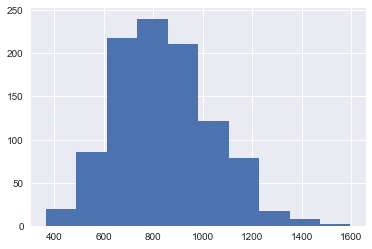

In [6]:
%matplotlib inline
plt.hist(Y)
plt.show()

In [7]:
X = np.concatenate((V,U),axis=1).astype(np.float32)
#X -= np.mean(X, axis = 0)
#X /= np.std(X, axis = 0)
x_train = X[0:-test_size,:]
x_test = X[-test_size:,:]

In [8]:
x_test.shape

(500, 2)

In [9]:
y_train = Y[0:-test_size]
y_test = Y[-test_size:]

In [10]:
y_test.shape

(500, 1)

In [11]:
np.std(Y)**2

37404.543296257267

### Generate Y

# Build the models

- Feedfoward NN with no hidden layer

## Model A. Linear Regression

In [ ]:
'''
1. Define model A: linear regression
'''
class LRModel(nn.Module):
    def __init__(self,D_in,D_out):
        super(LRModel,self).__init__()
        
        # From X directly to Y
        self.linear = nn.Linear(D_in,D_out)
        
    def forward(self,x):
        # Input: data 'x'
        # --> go thru self.linear as defined in __init__
        # get output 'out'
        out = self.linear(x)
        return out
    
'''
2. Instantiate the model class
'''
# Input is 11 (number of observations) by 2 (features (aka. attributes))
D_in = 2
# Numerical response has D_out = 1 
# If Y is binary, D_out = 2; if Y is multi-class, D_out = # of classes
D_out = 1

model = LRModel(D_in,D_out)

## Model B. FNN-1H

In [12]:
'''
1. Define model B: FNN-1H
'''
class FNNModel(nn.Module):
    def __init__(self,D_in,D_h,D_out):
        super(FNNModel,self).__init__()
        
        # From X to H
        self.fc1 = nn.Linear(D_in,D_h)
        # Activation on H
        self.relu = nn.ReLU()
        # From σ(w'x+b) to y 
        self.fc2 = nn.Linear(D_h,D_out)
        
        
        
        
    def forward(self,x):
        # Input: data 'x'
        # --> go thru self.linear as defined in __init__
        # get output 'out'
        out = self.fc1(x)
        
        out = self.relu(out)
        
        out = self.fc2(out)
        return out
    
'''
2. Instantiate the model class
'''

# Input is 10 (number of observations) by 2 (features (aka. attributes))
D_in = 2
# Numerical response has D_out = 1 
# If Y is binary, D_out = 2; if Y is multi-class, D_out = # of classes
D_out = 1
# D_h is the number of neurons in the hidden layer
# For deep learning (i.e. NN with multiple hidden layers), D_h could be different for different layers
D_h = 50

model = FNNModel(D_in,D_h,D_out)

## Train the models

In [13]:
'''
3. Loss function
'''
criterion = nn.MSELoss()

# learning_rate is the step size
learning_rate = 1e-1
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)


'''
4. Train
'''

epochs = 4000
y_hat = np.NaN
train_loss = []
test_loss = []

for epoch in range(epochs):
    epoch += 1
    
    # Convert Numpy array to torch vble
    inputs = Variable(torch.from_numpy(x_train))
    targets = Variable(torch.from_numpy(y_train))
    
    # Clear grad
    optimizer.zero_grad()
    
    # Forward prop to get outputs
    outputs = model(inputs)
    
    # Compute loss
    loss = criterion(outputs,targets)
    train_loss.append(loss.item())
    
    '''
    Backward propogation 
    
    (i.e. calculate the grad and move along the descent direction)
    '''
    # compute the grad
    loss.backward()
    # make a step
    optimizer.step()
    
    if epoch % 50 == 0:
        print('epoch {}, loss {}'.format(epoch,loss.item()))
    
    if epoch == epochs:
        y_hat_train = outputs
        
    '''
    Compute testing losses
    '''
    y_hat_test = model(Variable(torch.from_numpy(x_test)))
    test_targets = Variable(torch.from_numpy(y_test))

    test_loss.append(criterion(y_hat_test,test_targets).item())

epoch 50, loss 24557.23046875
epoch 100, loss 16325.2275390625
epoch 150, loss 11248.6298828125
epoch 200, loss 9852.5810546875
epoch 250, loss 9654.4169921875
epoch 300, loss 9471.4169921875
epoch 350, loss 9266.771484375
epoch 400, loss 9036.8251953125
epoch 450, loss 8776.5
epoch 500, loss 8480.064453125
epoch 550, loss 8138.33251953125
epoch 600, loss 7739.64892578125
epoch 650, loss 7268.857421875
epoch 700, loss 6716.38232421875
epoch 750, loss 6071.166015625
epoch 800, loss 5334.27587890625
epoch 850, loss 4520.53173828125
epoch 900, loss 3975.540771484375
epoch 950, loss 3285.1591796875
epoch 1000, loss 2629.043701171875
epoch 1050, loss 2609.173828125
epoch 1100, loss 2946.24462890625
epoch 1150, loss 1413.42724609375
epoch 1200, loss 1435.3536376953125
epoch 1250, loss 1224.62255859375
epoch 1300, loss 1227.524169921875
epoch 1350, loss 770.4290161132812
epoch 1400, loss 1090.679443359375
epoch 1450, loss 538.1492919921875
epoch 1500, loss 585.5423583984375
epoch 1550, loss 7

## Review results

In [17]:
y_hat_test = model(Variable(torch.from_numpy(x_test))) # a pytorch 'Variable'
y_hat_test = y_hat_test.detach().numpy().flatten() # transform 'Variable'back to numpy arrary

In [18]:
result = pd.DataFrame({'Y hat train': y_hat_train.detach().numpy().flatten(),
                       'Actual Y train': y_train.flatten(),
                       'Y hat test': y_hat_test,
                       'Actual Y test': y_test.flatten()})

In [19]:
result

,Y hat train,Actual Y train,Y hat test,Actual Y test
0,849.089172,844.062378,1063.752197,1062.778320
1,1022.674377,1018.991821,912.078125,926.205078
2,808.884583,805.991821,951.794128,935.463074
3,762.003784,755.724548,686.066101,696.211365
4,958.233276,964.700317,866.607483,893.616150
5,557.798035,543.658020,682.996643,680.015625
6,932.992310,918.009583,1082.072510,1076.931030
7,1070.581909,1063.628906,1090.780518,1102.852051
8,852.237732,849.401855,735.269531,750.672485
9,746.194824,774.504211,834.991760,844.727539


## Visualize the training and testing loss evolution

<IPython.core.display.Javascript object>


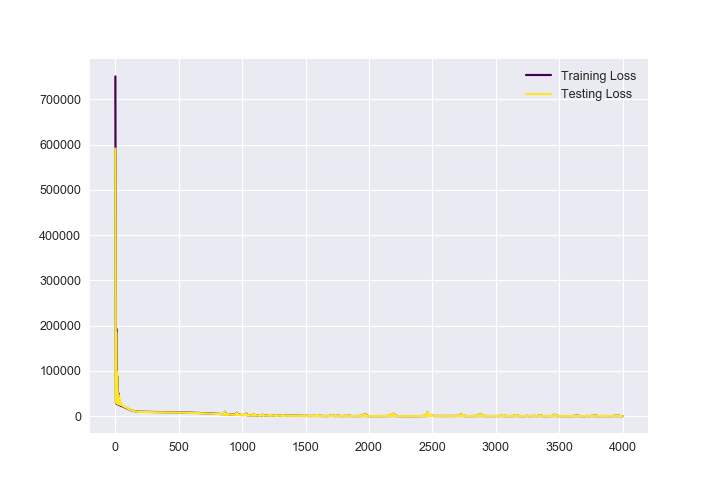

In [21]:
%matplotlib notebook
train_test_loss_plot(train_loss,test_loss)